Almost a year ago now I saw a tweet very much like the one below;

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Usual reminder: when I&#39;ve been saying for the past 5+ years that deep learning is interpolative, I don&#39;t mean it does linear interpolation in the original encoding space (which would be useless). It does interpolation on a low-dimensional manifold embedded in the encoding space.</p>&mdash; François Chollet (@fchollet) <a href="https://twitter.com/fchollet/status/1409941470304374787?ref_src=twsrc%5Etfw">June 29, 2021</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

Every time I saw one of these reminder tweets I was a little torn about how to feel. On the one hand I think that the idea that deep learning acts in an interpolative manner is an important one and is probably true in most contexts. I also think that it would be a great thing if more deep learning practitioners had this picture in their heads of what is going on under the hood in their networks. Because, it seems like one of the leading competing theories is that deep learning is just magic. The adherents of "deep learning is magic" theory of deep learning would of course 

A claim I hear often is that deep neural netwoks are just memorizing their training data or just learning to "interpolate" their training data


These sorts of criticisms didn't used to bother me much since I actually think there is definitely a good amount of truth to this criticism of deep learning in general. But with the recent large language models like GPT-3 as a sort of justification that there isn't anything like "real" intelligence going on. Memorization of the training corpus is definitely happening (for example you can get the models to regurgitate RSA keys from their training data). 

Showing that an AI can memorize its training data is absolutely not the same as showing that all its behavior can be chalked up to memorization. After all we humans happen to be capable of memorization too and that isn't a very strong argument against a high level of human intelligence. The dismissal of deep learning based systems as not having "real intelligence" simply because the deep learning systems look like scaled up versions of things which we think we understand (interpolation and function approximation via loss minimization) feels intellectually lazy to me. Perhaps there is a small spark of something that looks like "real intelligence" in the large language models or perhaps we really can just chalk the behavior all up to what is essentially a kind of fuzzy memorization of training data. But then again maybe real intelligence could be achieved by memorization with the right kind of "fuzziness". 

I will say that the hype surrounding the large language models is wildly overblown. 

But it is also lazy to just hide behind the sheer scale of these models and say that we don't really need to understand these models but that we should just put our trust in ever larger scale of data and compute and hope that AGI lies down that path. 

You don't need a model with billions of parameters in order to see behavior in deep networks that is very awkward to explain from the perspective of function approximation or interpolation. Just because the mathematical framing of deep learning looks like the theory of function approximation that doesn't at all mean that it is always the best framework for understanding the learning dynamics of deep nets, though it is definitely one helpful way to think about what is going on!

<!-- END_TEASER -->

# A Simple Non-Interpolative Problem

Before I tell you what the task is I want to give you the chance to figure out the pattern for yourselves if you are so inclined. If we were doing things in a way which is more similar to how I will feed the data to the network below then I would give you the inputs one at a time and ask you to respond with one of several possible discrete responses lets call the possible responses are A,B,C,D and E. After you give me each answer I tell you what the correct response was corresponding to that input and then give you the next input and wait for a response and so on. But that would get rather tedious for me to input the information that way and you will no doubt want to see the input/output pairs from the past in order to consider your next response as you try to figure out the pattern. So instead I will give a long enough of a sequence of input/output pairs that you can use to figure out the pattern and then will give a short sequence of prompt answer pairs that you can use to test your theories. The pattern is not complicated so don't overthink it. 

```
Input Response
04    A
19    A
10    A
40    A
17    A
19    B
17    B
48    A
07    A
04    B
01    A
19    C
19    D
22    A
21    A
06    A
07    B
19    E
47    A
17    C
01    B
10    B
06    B
17    D
10    C
41    A
40    B
24    A
04    C
07    C
05    A
41    B
05    B
02    A
24    B
05    C
02    B
40    C
06    C
05    D
48    B
07    D
05    E
01    C
24    C
41    C
```

And now as promised here is a short sequence of prompts and answers the answers should be white text on a white background. So highlight each line to see the answer.


Input=02 Response=<span style="color: #ffffff">C</span>;

Input=17 Response=<span style="color: #ffffff">E</span>;

Input=21 Response=<span style="color: #ffffff">B</span>;

Input=15 Response=<span style="color: #ffffff">A</span>;


If you got the answer to all of these right especially for the 15 prompt then I think you probably figured out what the pattern was. Instead of giving you immediate gratification and telling you what the pattern really is right away I'm going to put a wall of text between you and the answer (I'm so kind I know). That method of obfuscation should work even for those of you with some sort of dark mode turned on in your browser. If you really desperately need immediate confirmation just scroll down to just above where the code starts. I used the same code to generate these sets of examples as I use to generate the data set to feed into the neural net but with just 50 possible symbols and just a small number of possible input repeats, otherwise spotting the pattern would have become a task in data analysis instead of pattern recognition. The neural network needs the larger number of possible examples because it is starting from nothing and so has no concept of ordinal sets and in principle has no memory since it is just a simple feed forward network (but as we will see this turns out not to be completely true). 

One quick remark before moving on, if you figured out what the pattern was then it should be clear to you why I say that this problem cannot be solved "interpolatively". Namely any input will never have the same output as a correct response twice. Obviously solving such a problem by any sort of direct interpolation couldn't work since each new example is guaranteed to be pushing into previously unexplored territory. This doesn't quite rule out the mechanism of "Deep Interpolation" but I hope that you will agree with me that with a problem like this thinking about things in terms of analogies to classical interpolation or curve fitting and the like is at best a little awkward.

## Interpolation and Function Approximation via Loss Optimization

To help you understand my critique of why I think deep learning is not just carrying out interpolation/function approximation/curve fitting we need to talk about those things in at least a small amount of techncial detail.

In the usual sense of the word a function $\hat{y} = f(x)$ is said to interpolate a given set of sample points $(x_i, y_i)$ if $f(x_i) = y_i$ for all available $x_i$ and $y_i$. In general the y values will be a noisy function of x so an interpolation of our data may not even be possible. For example we might have two observed x values which are associated with different y values. 

Because of this often the requirements of interpolating functions are relaxed and instead we look for functions which well approximate our sample data $y_i \approx f(x_i)$. What imeans for the data to be "well approximated" is codified by picking some sort of loss function $L(y_i, f(x_i) \in \mathbb(R)$  and then search for a function that minimizes the expected value of that loss. Generally the search is over a family of parameterized functions $f(x) = g(x, \theta)$. 

For most commonly chosen losses (e.g. mean squared erorr or KL divergence) a function which achieves a global minimum loss on the training data is also an interpolating function (if an interpolating function is a member of the family of functions being optimized over). Even when no interpolation is possible the functions which minimize the loss are still likely good approximations to the sample data. Which makes the function approximation view a very attractive generalization of interpolation.

From this perspective deep learning is just one method of function approximation where our chosen family of functions to optimize over $g(x, \theta)$ happen to look like a nested series of activation functions, matrix multiplications, and vector additions and our optimization strategy is some flavor of gradient descent.

## Conditions for Assuring Good Generalization

But there is a major difference between the way we think of the generalization behavior of classical interpolating functions and the generalization behavior observed in deep  networks. 

Classically we should expect good generalization of a learned function if our data, function class, and loss meet a few conditions; 

* Well Specified: The family of functions we are optimizing over contains a good approximation of the true underlying process generating our data.
* Nearly Unique Optima: The family of functions isn't so large that there are many essentially different functions which give nearly equivalently good predictions on our observed sample set.
* Well Covered Domain: The input data spans the full range of possible inputs and the data is sampled densely enough to capture significant changes in the prediction target.


If any of these conditions are violated then one could reasonably expect that the learned mapping of inputs to outputs will likely generalize poorly. 

The first condition is pretty unassailable if our chosen family of functions isn't flexible enough to represent the desired input/output mapping then the generalization performance of the function we choose will obviously be limited by this fact. We can always enlarge the search space of functions to include ever more possibilities but eventually we run afoul of the second condition. 

The condition of there being just a few functions which closely reconstruct our data requires a little more thought to unpack but makes good intuitive sense if you think about it carefully. Suppose there are many many essentially different functions inside our chosen functional family all of which closely reconstruct our currently observed data. Because the functions are essentially different from each other their predicted values outside of the footprint of the observed data should tend to differ from each other quite dramatically. This would mean that if you pick a random pair of loss optimal functions the predictions outside the training footprint would tend to differ from each other and since only one of them can be correct the then most of these candidate functions would have poor generalization. With this same logic you would naively expect that the worse this problem is (the more flexible your model is and therefore the larger the space of possible optima) the worse you might expect your generalization performance to be. 

The last condition that our observed data should cover the space of possibilities I think also makes good intuitive sense. If our observed data doesn't full span the range of possibilities then how can we know that the structure of the underlying function doesn't dramatically change as we pass some important threshold? Similarly if the true underlying function has regions interior to our sample points where the prediction target changes rapidly if we don't have observations which are close enough to capture that rapid change then how can we expect the learned approximating function to reflect these unobserved fluctuations?

## The Surprising Generalization Power of Over-Parameterized Deep Nets

One of the most intriguing things about deep neural networks is that they often generalize surprisingly well even in situations where most of the above conditions are badly violated. Sufficiently wide and deep neural networks are universal approximators and so the condition of there being at least one member of the search family which closely approximates the underlying function is basically always satisfied just so long as the target functions aren't too pathological.

But for that very same reason deep networks often badly violate the condition that there shouldn't be many essentially different functions in the family which reconstruct the given sample data. Above we argued intuitively that having a huge search space of possible functions will cause problems because a randomly chosen loss optimal function will have effectively random predictions outside of the footprint of the training data. There we were just talking about large flexible functional families in the abstract but for deep networks we actually have clear empirical evidence that this is actually the case. If you use standard well performing architectures for computer vision taks but replace the true labels with completely random noise <a href=https://arxiv.org/abs/1911.04301> the network can still learn to perfectly reproduce those random training labels</a> (though it should be noted that it does require a little longer to learn the random labels than it takes to learn to predict the true labels). Which shows that for the networks which are actually used in practice the space of optima really does contain a near infinitude of functions with essentially random predictions. But the current deep learning wisdom is that the more flexible you make your networks (and so the worse you make the problem of non-unique optima) the better generalization performance you actually tend to get. 

Deep nets are also often one of the methods which can best deal with problems where our data has poor domain coverage. The quintessential example here is computer vision tasks. Images are extremely high dimensional observations and thanks to the curse of dimensionality that means that just about all samples will lie somewhere close close to or beyond the convex hull of the observations that have come before which means that we cannot expect our training data to span the space of possible observations and of course no matter how large our training data sets become we will never come even close to densely sampling the space of possible images for even relatively modest resolutions. 

In the abstract general case there really is no free lunch and you need to make up for any short fall in the amount of data you have with prior knowledge about the relationships you are trying to model. But the relationships we want to model aren't drawn uniformly from the abstract space of all possible functions they represent real world relationships, and apparently those real world relationships are often ones where deep learning approaches act as good inductive priors. 

I think the tempation is great to presuppose that the reason that deep learning works well is because the class of functions which are simple to express as deep nets are similar to relationships which we see in real world data sets. But although I do think this is a part of the story I think it is a less important part of the story than you might initially think. The space of functions spanned by really large deep networks is mostly a wasteland of nearly structureless effectively random functions. From the arguments above we can see that even if we somehow had access to all of the possible networks with optimal loss values if we were to pick a random network from that set then we would almost certainly pick a network which had very poor generalization properties. 

So I don't think it is primarily the sorts of fuctions that look like deep networks that is most important for explaining generalization but rather how that space of functions is actually explored, or in other words it isn't what it is possible for deep networks to learn that makes them useful it is how they learn.
It is well known that for complex non-linear models it is extremely difficult for any optimization algorithm no matter how fancy to not get stuck in a local optimum. Although there are excpetions deep networks are typically trained with nothing like fancy optimization algorithms and are mostly just trained with some flavor of SGD (stochastic mini-batch gradient descent). But interestingly there is a lot of evidence to support the idea that using an objectively poor optimization algorithm. Ordinarily in optimization tasks getting stuck in a local optimum is a bad thing but it seems that for deep nets it seems to act as a good regularization mechanism. So surprisingly even though the full space of global optima tend to be poorly performing the local optimum which is likely to be found by typical deep learning training approaches seem to typically to perform much better. 

If you consider the continuous version of the gradient descent optimization process where we take infinitesimally small steps in the direction of the gradient the possibility of getting stuck in a local optimum becomes a guarantee. That isn't remarkable or even terribly interesting in and of itself after all it isn't like this fact helps you find that local optimum point. The only way to do that is to actually run the learning process with a very low learning rate and no sources of noise like the selection of randomized batches or dropout regularization or the like, and these sources of noise are known to improve the ultimate result so in practice you would never want to do that anyway. 

But one of the big stories in recent years about how deep learning works under the hood is that something kind of remarkable happens when you 

<a href=https://en.wikipedia.org/wiki/Neural_tangent_kernel>Neural Tanget Kernel</a>. In the NTK limit the deep learning process actually becomes equivalent to a peculiar type of linear model where each data point effectively becomes a feature vector with the peculiar feature vector being determined by the model architecture. In the infinite width limit all local optima are also global optima and so the limitation that our learning process will definitely get stuck in a local optimum isn't much of a problem and picking the optimum which 

To be precise each data point becomes associated with an infinite dimensional feature vector but because the learning dynamics is dictated only by the peculiar footprint of the actual training data the learning dynamics becomes equivalent to a linear system with one feature vector per data point. Those features being the neural tangent kernel evaluated with each data point $x_i$ as one of the arguments and the point at which we are evaluating the feature as the other argument $F_i(x) = K(x_i, x)$. 

If you aren't too familiar with the mathematical details of kernel methods or for wahtever reason the reasoning of the above paragraph isn't clear to you the details aren't really important to the story I'm trying to tell in this post. The take aways that I'm trying to communicate is that even though we don't explicitly ask the model to draw analogies between its input data and it's training examples 

## Interpolation as Similarity + Label Averaging

The terms "curve fitting" and "function approximation" don't necessarily come with any additional implicit mental structure on top of this search over a family of functions for a special few which well describe our data.  
But when people call deep learning "interpolative" I think often they are also implicitly drawing an analogy between the typical sorts of methods which are employed in exact interpolation and the imagined mechanism of operation of a deep net. 

The most common sort of exact interpolation methods operate by finding $f(x)$ is constructed by finding close known points $x_i$ and then estimating $\hat{y}(x)$ as some weighted mixture of the associated $y_i$. If you are clever with how you select your $x_i$ and how you construct your weights you can ensure that the weighted average is always equal to $y_i$ when $x = x_i$.

For example one clever interpolation scheme is to evaluate the sum  

$$
\hat{y}(x) = \frac{1}{\sum_{x_i} w(x, x_i)}  \sum_{x_i} y_i w(x, x_i)
$$

With well chosen weight functions this scheme can give easy to implement function approximations in any number of input and output dimensions, if a little inefficient since the sum is over all the data. If you want the interpolation to be exact at the sample points then you could for example either pick a weight function $w(x, x_i)$ such that the weights $w(x, x_i) \to \infty$ as $x \to x_i$. It takes a little more work but you can also engineer the weights so that exactly on top of each sample point the only non-zero weight is the weight associated to that particular sample point. These sorts of schemes are usually designed so that only a small fraction of $x_i$ are assigned non-zero weights which can make them much more performant and much more commonly used in practice.

It will be useful for our analysis here to note that you can merge the normalization term $\frac{1}{\sum_{x_i} w(x, x_i)}$ and the weight function $w(x, x_i)$ into a "bump function" 

$$
h_i(x) = \frac{w(x, x_i)}{\sum_{x_i} w(x, x_i)}
$$

and the interpolating function is then just

$$
\hat{y}(x) = \sum_{i} y_i h_i(x)
$$

The important insight is that each $h_i$ is a kind of similarity detector which becomes active when the point $x$ is close to one of our sampled points and which is inactive otherwise. The more active a bump function is the closer the output interpolation becomes to the associated sampled label.

## An Implicit Deep Learning Similarity Manifold 

But interpolation of labels directly in the input feature space is not what is meant when people talk about deep nets being interpolative. I will let the person from whom I hear this viewpoint the loudest and most frequently speak for themselves,



Which is to say that you could try to think of the action of a deep network as being a combination of some sort of  embedding function $\phi(x)$ and an interpolator acting on the values $\phi_i = \phi(x_i)$ instead of directly on the input space itself. Although not mentioned in that particular tweet François also frequently tweets that deep learning is "just" function approximation and I suspect he sees the terms interpolation and function approximation as being largely interchangeable (as I myself do in most contexts). It is important to note that the implicit feature space $\phi(x) \in \Phi$ isn't necessarily explicitly calculated by the neural network. But rather if this  implicit low dimensional data manifold does in fact exist in the abstract then it can help to explain why neural networks are able to generalize in the way that they do.

## "Deep Interpolation"

We are now ready to put this all together into a qualitative theory of deep learning couched in terms of manifold learning and interpolation/memorization.

You may look at the above weighted average formula and not see much similarity with the calculations being carried out inside a deep net. Certainly there is no explicit sum over the training data and labels going on inside a deep net. But you could make an intuitive connection between the "bump functions" mentioned above and the features in the second to last layer of the neural network. In which case we could think of the sum up above in terms of a matrix multiplication,

$$
\hat{y} = HY 
$$

where the $H$ is a matrix in which the columns are "bump" like feature vectors which are active when an input $x$ is "like" one of the training data points. In the case of a neural network we can think of two points as being "like" each other in this sense if they are close in the abstract space $\phi(x)$. Likewise the rows of the Y matrix are just equal to the labels of the associated data points. 

Written this way it is starting to look a lot like what goes on in the last layer of a neural network. Instead of thinking of the sum as being over training examples what if we switch to thinking of the sum as being over the channels of a deep network? 


Lets call this alternative sum/matrix multiplication which represents the action of one layer of a neural net $\hat{y}' = H'Y'$. Since both $HY$ and $H'Y'$ are supposed to closely approximate our training data then hopefully $H'Y' \approx HY$. Although it isn't necessarily the result that we would get if we actually trained a deep network a good intuitive way to achieve this approximation would be to clump the data points $x_i$ together into a number of clusters equal in number to the number of input channels at the last layer. If we simply summed up the columns from $H$ which are mapped together in a cluster into a column of $H'$ and assigned the average $y$ labels over each cluster to the rowws of $Y'$ then if we have enough clusters/channels in our network then we will get a good approximation to the result of the interpolation system where we do explicitly carry out the sum over the training data.

In fact we didn't need to do any of the above analysis to show that deep networks can closely approximate feature extractors and interpolators because large neural networks are <a href=https://en.wikipedia.org/wiki/Universal_approximation_theorem>universal approximators</a>.  But just because a deep neural network could in principle learn a function which looks a lot like an interpolation over some sort of abstract feature space does not mean that the solutions corresponding to interpolators are what is found by a deep learning training process in general. 

The above discussion is just to help draw some intuitive connections. However, although I argued that the bulk of the network could in principle learn to represent some sort of bump function basis over an implicit feature space and the last layer could in principle learn to encode memorized associated label weights there is no strong reason for this to be happening in a separable way. All three functions of extractor, bump encoder, and label interpolator the functions can be distributed holographically over all the layers of the network. Explicitly trying to identify what weights are responsible for what function is either difficult or potentially impossible. We should in general expect the activations of the network to be some sort of soup containing a little bit of feature extraction, a little bit of patch encoding, and a little bit of label memorization even if that is all that is effectively going on in the deep nets.

## The Data Set

When I sat down to start writing this post in June 2021 (jeez it took me a long time to finish this up...) I figured there were two general sorts of strategies that I could take to see non-interpolative non-simple function approximation behavior in deep nets. One was to somehow design inputs which were "fundamentally different" than those in the training data but where the relatiohsip between inputs and outputs was the same (whatever that means) and the other strategy was to keep the inputs the same between train and test but to use a different relationship between input and output data at testing time than was seen previously.

As for the first approach I don't think there is really a good objective way to define what it means for something to be "fundamentally different" than something else. If a deep net learned to predict on the new input data then doesn't that mean that they weren't really "fundamentally different" after all? Likewise if the network doesn't learn to predict well that doesn't mean that there isn't some sort of good one to one mappig between the seemingly different input domains it just means the network couldn't find it. 

Which meant that I needed to go the second route. I needed to find a way to change the relationship between input $x$ and desired output $y$. Obviously the shift in relationship can't be so dramatic that learning to predict future values is impossible. But it also can't be so simple that you can predict the next value in the sequence without knowing what the input is at all. 

The task that eventually came to mind could be called "instance counting". You pass a sequence of unique symbols into a network and ask the network to predict a different class for that input each time it is passed in. The first time you pass a symbol you label it as "class 0" the second time you label it as "class 1" the third time you label it as "class 2" and so on. The pattern wouldn't be too difficult to discern for a "real" human level AI. 


The naive way of generating a training data stream for this counting problem would be to randomly uniformly pick 

In order to make the labels in the data set roughly equally distributed over all possible counts we generate the data by first picking a desired number of times to have seen each symbol before and then randomly pick from the set of symbols that have previously been seen exactly that many times as the next symbol to put in the data stream. If there are currently no symbols which have been seen exactly that many times we just pick another target count and keep going.

In [48]:
import numpy as np
import random
import itertools
import scipy.ndimage
import matplotlib.pyplot as plt

plt.rcParams.update(
    {
        "figure.figsize":(12, 6),
        "font.size":18,
    }
)

import tensorflow as tf
import tensorflow.keras.layers as L

def make_instance_counting_data_set(
    symbols,
    max_repeats,
    sequence_length,
):
    counts_to_options = {i:[] for i in range(1, max_repeats+1)}
    counts_to_options[0] = symbols
    
    int_values = []
    times_repeated = []
    prob_history = []
    
    for i in range(sequence_length):
        num_candidates = np.array([len(counts_to_options[c]) for c in range(max_repeats+1)])
        #selection_p = np.sqrt(num_candidates)
        selection_p = np.log(1.0+num_candidates)
        
        selection_p /= np.sum(selection_p)
        prob_history.append(selection_p)
        
        target_count = np.random.choice(
            np.arange(max_repeats+1),
            p=selection_p,
        )
        option_list = counts_to_options[target_count]
        random_index = np.random.randint(len(option_list))
        sampled_int = option_list.pop(random_index)
        if target_count < max_repeats:
            counts_to_options[target_count+1].append(sampled_int)
        int_values.append(sampled_int)
        times_repeated.append(target_count)
    
    return np.array(int_values), np.array(times_repeated), np.array(prob_history)


In [49]:
max_repeats = 10
n_classes = max_repeats+1
n_symbols= 1000
sequence_length=50

In [50]:
tx, ty, true_probs = make_instance_counting_data_set(
    symbols = list(range(n_symbols)),
    max_repeats=max_repeats,
    sequence_length=sequence_length,
)

In [51]:
cat_map = "ABCDE"
print("\n".join([f"{a:002d}    {cat_map[b]}" for a,b in zip(tx, ty)]))

04    A
19    A
10    A
40    A
17    A
19    B
17    B
48    A
07    A
04    B
01    A
19    C
19    D
22    A
21    A
06    A
07    B
19    E
47    A
17    C
01    B
10    B
06    B
17    D
10    C
41    A
40    B
24    A
04    C
07    C
05    A
41    B
05    B
02    A
24    B
05    C
02    B
40    C
06    C
05    D
48    B
07    D
05    E
01    C
24    C
41    C
02    C
17    E
21    B
15    A


In [27]:
list(zip(tx, ty))

[(7, 0),
 (3, 0),
 (16, 0),
 (16, 1),
 (12, 0),
 (13, 0),
 (17, 0),
 (19, 0),
 (16, 2),
 (16, 3),
 (16, 4),
 (11, 0),
 (9, 0),
 (17, 1),
 (0, 0),
 (9, 1),
 (6, 0),
 (0, 1),
 (15, 0),
 (15, 1),
 (10, 0),
 (2, 0),
 (0, 2),
 (17, 2),
 (9, 2),
 (19, 1),
 (2, 1),
 (17, 3),
 (15, 2),
 (14, 0),
 (8, 0),
 (13, 1),
 (2, 2),
 (18, 0),
 (11, 1),
 (3, 1),
 (4, 0),
 (4, 1),
 (1, 0),
 (5, 0),
 (7, 1),
 (15, 3),
 (5, 1),
 (6, 1),
 (0, 3),
 (6, 2),
 (19, 2),
 (11, 2),
 (5, 2),
 (13, 2)]

In [17]:
inset = set(tx[np.where(ty[:500] > 4)])
mask = np.array([x in inset for x in tx[:500]])

In [20]:
list(
    zip(tx[:500][mask], ty[:500][mask])
)

[(85, 0),
 (580, 0),
 (502, 0),
 (85, 1),
 (608, 0),
 (320, 0),
 (580, 1),
 (608, 1),
 (320, 1),
 (378, 0),
 (85, 2),
 (675, 0),
 (502, 1),
 (502, 2),
 (378, 1),
 (85, 3),
 (646, 0),
 (378, 2),
 (10, 0),
 (10, 1),
 (580, 2),
 (375, 0),
 (621, 0),
 (85, 4),
 (621, 1),
 (580, 3),
 (675, 1),
 (646, 1),
 (502, 3),
 (646, 2),
 (675, 2),
 (85, 5),
 (378, 3),
 (378, 4),
 (85, 6),
 (621, 2),
 (255, 0),
 (10, 2),
 (255, 1),
 (85, 7),
 (580, 4),
 (10, 3),
 (85, 8),
 (608, 2),
 (646, 3),
 (320, 2),
 (85, 9),
 (621, 3),
 (375, 1),
 (320, 3),
 (646, 4),
 (10, 4),
 (675, 3),
 (255, 2),
 (10, 5),
 (646, 5),
 (646, 6),
 (378, 5),
 (502, 4),
 (375, 2),
 (320, 4),
 (580, 5),
 (621, 4),
 (502, 5),
 (320, 5),
 (378, 6),
 (375, 3),
 (10, 6),
 (255, 3),
 (502, 6),
 (378, 7),
 (320, 6),
 (608, 3),
 (580, 6),
 (675, 4),
 (580, 7),
 (10, 7),
 (580, 8),
 (621, 5),
 (375, 4),
 (646, 7),
 (580, 9),
 (675, 5),
 (675, 6),
 (621, 6),
 (255, 4),
 (502, 7),
 (378, 8),
 (675, 7),
 (320, 7),
 (675, 8),
 (255, 5),
 (675,

In [9]:
list(zip(tx[:50] , ty[:50]))

[(85, 0),
 (580, 0),
 (502, 0),
 (189, 0),
 (85, 1),
 (608, 0),
 (696, 0),
 (99, 0),
 (538, 0),
 (547, 0),
 (320, 0),
 (289, 0),
 (580, 1),
 (116, 0),
 (402, 0),
 (608, 1),
 (465, 0),
 (320, 1),
 (509, 0),
 (665, 0),
 (504, 0),
 (393, 0),
 (50, 0),
 (140, 0),
 (276, 0),
 (625, 0),
 (448, 0),
 (20, 0),
 (378, 0),
 (85, 2),
 (433, 0),
 (525, 0),
 (603, 0),
 (569, 0),
 (257, 0),
 (440, 0),
 (425, 0),
 (293, 0),
 (675, 0),
 (274, 0),
 (502, 1),
 (502, 2),
 (378, 1),
 (193, 0),
 (400, 0),
 (331, 0),
 (85, 3),
 (619, 0),
 (694, 0),
 (333, 0)]

Text(0, 0.5, 'Time')

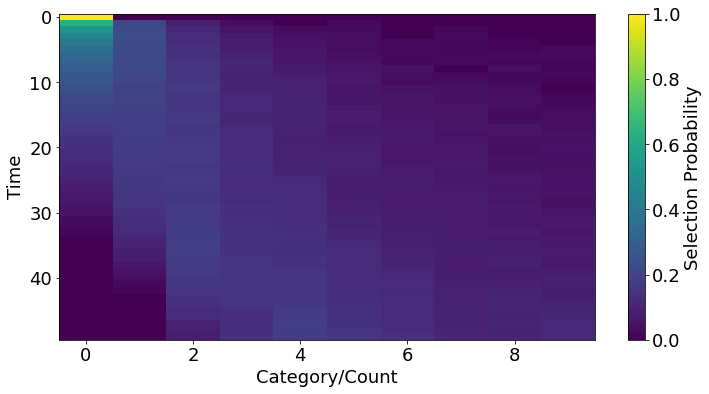

In [12]:
plt.imshow(true_probs[::100], aspect="auto", interpolation="nearest")
plt.colorbar().set_label("Selection Probability")
plt.xlabel("Category/Count")
plt.ylabel("Time")

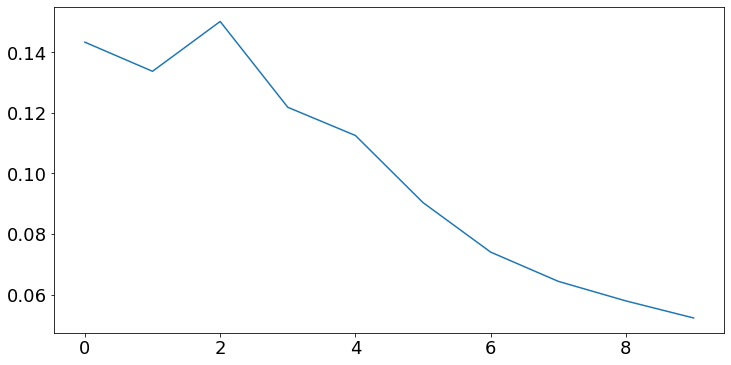

In [13]:
plt.plot(np.mean(true_probs, axis=0))

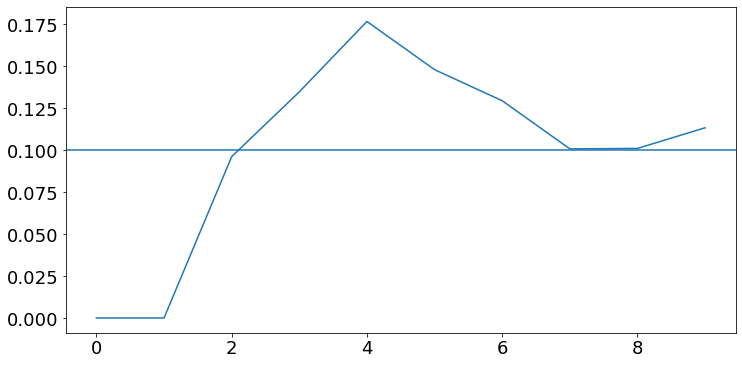

In [14]:
plt.plot(np.mean(true_probs[-500:], axis=0))
plt.axhline(0.1)

In [15]:
baseline_accuracy = np.max(true_probs, axis=1)#scipy.ndimage.filters.gaussian_filter(c.astype(float), 500)

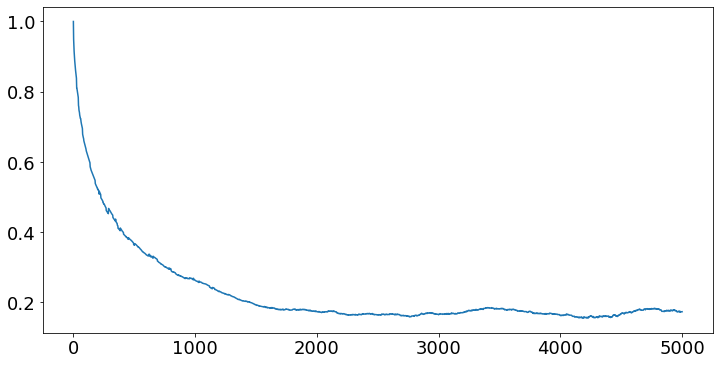

In [16]:
plt.plot(baseline_accuracy)

In [17]:
len(tx)

5000

# A Simple Network

If this were any sort of normal classification problem I was trying to solve with a neural network the standard approach is pretty clear. Build up some sort of embedding layer for the input symbols (as you would for any sort of categorical inputs) and then slap a stack of a few dense layers (possibly with some dropout) and relu activations and then finally follow that up with an output layer with a softmax activation and a number of outputs equal to the number of possible classes and train that up with an Adam optimizer and see what you get.

In [18]:
def build_network(
    vocabulary_size,
    layer_channels,
    n_dims_emb,
    n_classes,
    dropout=-1,
    learnable_embedding=True,
):
    x_in = L.Input(shape=[], dtype=tf.int64)
    x = x_in
    x = L.Embedding(vocabulary_size, n_dims_emb, trainable=learnable_embedding)(x)
    for n_ch in layer_channels:
        x = L.Dense(n_ch, activation="relu")(x)
        if dropout > 0:
            x = L.Dropout(dropout)(x)
    
    x = L.Dense(n_classes, activation="softmax")(x)
    return tf.keras.models.Model(x_in, x)

In [200]:
help(tf.keras.optimizers.Optimizer)

Help on class OptimizerV2 in module tensorflow.python.keras.optimizer_v2.optimizer_v2:

class OptimizerV2(tensorflow.python.training.tracking.base.Trackable)
 |  OptimizerV2(name, gradient_aggregator=None, gradient_transformers=None, **kwargs)
 |  
 |  Base class for Keras optimizers.
 |  
 |  You should not use this class directly, but instead instantiate one of its
 |  subclasses such as `tf.keras.optimizers.SGD`, `tf.keras.optimizers.Adam`, etc.
 |  
 |  ### Usage
 |  
 |  ```python
 |  # Create an optimizer with the desired parameters.
 |  opt = tf.keras.optimizers.SGD(learning_rate=0.1)
 |  # `loss` is a callable that takes no argument and returns the value
 |  # to minimize.
 |  loss = lambda: 3 * var1 * var1 + 2 * var2 * var2
 |  # In graph mode, returns op that minimizes the loss by updating the listed
 |  # variables.
 |  opt_op = opt.minimize(loss, var_list=[var1, var2])
 |  opt_op.run()
 |  # In eager mode, simply call minimize to update the list of variables.
 |  opt.minimi

In [188]:
dir(tf.keras.optimizers)

['Adadelta',
 'Adagrad',
 'Adam',
 'Adamax',
 'Ftrl',
 'Nadam',
 'Optimizer',
 'RMSprop',
 'SGD',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'deserialize',
 'get',
 'schedules',
 'serialize']

In [190]:
net = build_network(
    vocabulary_size=n_symbols,
    layer_channels = [256, 128, 128, 128, 128, 128],
    n_dims_emb=512,
    n_classes=n_classes,
    dropout=-1,#0.2,
    learnable_embedding=True,
)
net.compile(
    #optimizer=tf.keras.optimizers.Adagrad(),
    #optimizer=tf.keras.optimizers.SGD(lr=0.5),
    #optimizer=tf.keras.optimizers.Adadelta(),
    #optimizer=tf.keras.optimizers.SGD(lr=0.1, momentum=0.9),
    #optimizer=tf.keras.optimizers.SGD(lr=0.5),
    #optimizer=tf.keras.optimizers.SGD(lr=0.02),
    #optimizer="adam",
    #tf.keras.optimizers.Adam(learning_rate=0.001),
    #optimizer=tf.keras.optimizers.Adamax(),
    #optimizer=tf.keras.optimizers.Nadam(),    
    optimizer=tf.keras.optimizers.RMSprop(),        
    #optimizer=tf.keras.optimizers.Ftrl(),        
    #optimizer=tf.keras.optimizers.Ftrl(learning_rate_power=-0.5),        
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics="accuracy",
)

In [191]:
net.summary()

Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        [(None,)]                 0         
_________________________________________________________________
embedding_21 (Embedding)     (None, 512)               358400    
_________________________________________________________________
dense_147 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_148 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_149 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_150 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_151 (Dense)            (None, 128)               165

In [192]:
print_freq = 250

In [193]:
loss_vals = []
running_top1 = []
k=2
running_topk = []
prob_of_prev = []
prob_of_true = []

for i in range(len(tx)):
    lb = i
    ub = lb+1
    #predict on the next sample prior to using it as training data
    pvec = net.predict_on_batch(tx[lb:ub])
    pred_order = np.argsort(-1.0*pvec, axis=1)
    correct = pred_order[:, 0] == ty[lb:ub]
    running_top1.append(np.mean(correct))
    running_topk.append(np.mean(np.sum(pred_order[:, :k]==ty[lb:ub], axis=1)))
    
    cy ,= ty[lb:ub]
    if cy == 0:
        pred_prob_prev = np.nan
    else:
        pred_prob_prev = pvec[0, cy-1]
    
    prob_of_prev.append(pred_prob_prev)
    prob_of_true.append(pvec[0, cy])
    
    loss_vals.append(net.train_on_batch(tx[lb:ub], ty[lb:ub]))
    
    if i % print_freq == print_freq-1:
        #print(i)
        #print(np.mean(loss_vals[-1000:], axis=0))    
        print(np.mean(running_top1[-print_freq:]), end=" ")

0.66 0.408 0.38 0.308 0.304 0.348 0.268 0.296 0.256 0.232 0.296 0.26 0.256 0.252 0.324 0.272 0.272 0.344 0.28 0.232 

(0.0, 0.75)

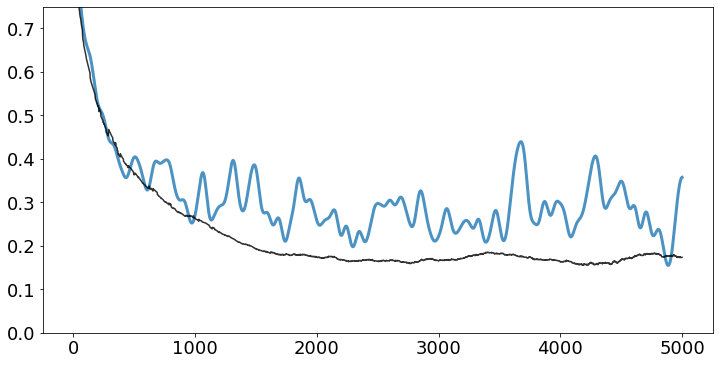

In [194]:
sigma = 30
#plt.plot(scipy.ndimage.filters.gaussian_filter(max_probs, sig), color="k", linestyle="--")
plt.plot(scipy.ndimage.filters.gaussian_filter(running_top1, sigma), alpha=0.8, lw=3)
plt.plot(baseline_accuracy, linestyle="-", color="k", alpha=0.8)

plt.ylim(0, 0.75)

In [195]:
import pandas as pd

In [196]:
df = pd.DataFrame(
    {
        "pt":prob_of_true,
        "pp":prob_of_prev,
    }
).dropna()

In [197]:
np.mean(df.pt >= df.pp)

0.5058139534883721

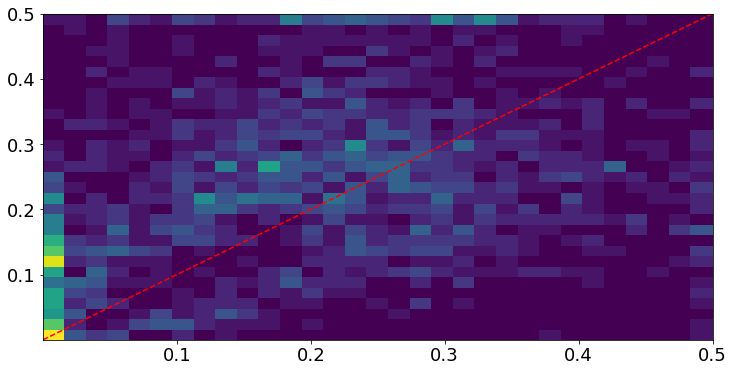

In [198]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.hist2d(
    np.clip(df.iloc[-1500:].pp, 0, 0.5),
    np.clip(df.iloc[-1500:].pt, 0, 0.5),
    (31, 31),
    #alpha=0.2,
);
plt.plot([0, .5], [0, 0.5], linestyle="--", color="r")

Text(0, 0.5, 'Likelihood that $\\hat{y}_i > \\hat{y}_{i+1}$')

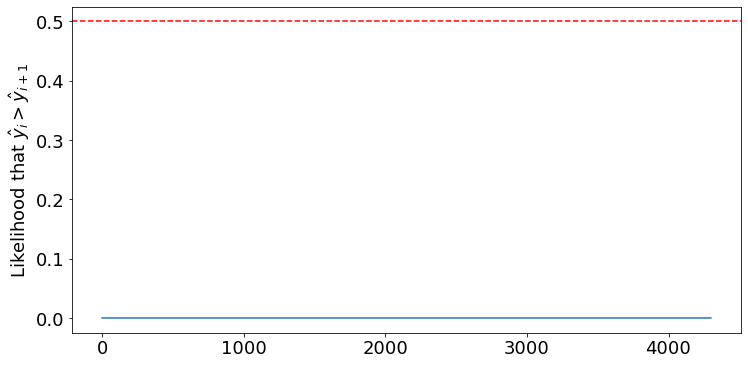

In [181]:
plt.plot(
    scipy.ndimage.filters.gaussian_filter(
        (df.pt >= df.pp).astype(float),
        100
    ),
)
plt.axhline(0.5, linestyle="--", color="r")
plt.ylabel(
    "Likelihood that $\hat{y}_i > \hat{y}_{i+1}$"
)

In [302]:
loss_vals

[[3.0419979095458984, 0.0],
 [3.0199248790740967, 1.0],
 [3.047734260559082, 0.0],
 [3.0004477500915527, 1.0],
 [2.980807304382324, 1.0],
 [2.9434239864349365, 1.0],
 [2.920285224914551, 1.0],
 [3.0924198627471924, 0.0],
 [2.8680009841918945, 1.0],
 [2.8365213871002197, 1.0],
 [2.766472339630127, 1.0],
 [3.0136706829071045, 0.0],
 [2.9927854537963867, 0.0],
 [2.622079849243164, 1.0],
 [2.4853739738464355, 1.0],
 [2.46869158744812, 1.0],
 [2.909867286682129, 0.0],
 [2.227839231491089, 1.0],
 [1.9649622440338135, 1.0],
 [3.1771080493927, 0.0],
 [1.7238097190856934, 1.0],
 [1.4353837966918945, 1.0],
 [1.2095247507095337, 1.0],
 [3.4480676651000977, 0.0],
 [0.781840443611145, 1.0],
 [0.5498285889625549, 1.0],
 [3.2633628845214844, 0.0],
 [0.3041220009326935, 1.0],
 [0.2507345676422119, 1.0],
 [4.393617630004883, 0.0],
 [6.00225830078125, 0.0],
 [0.1639137864112854, 1.0],
 [4.947340488433838, 0.0],
 [3.363274335861206, 0.0],
 [0.33314186334609985, 1.0],
 [0.5060741901397705, 1.0],
 [0.47431

In [19]:
acc = np.array([lv[1] for lv in loss_vals])

In [20]:
calc_ent = lambda p: -1.0*np.sum(p*np.log(p))
pvec = np.bincount(ty)/len(ty)
ent_val = calc_ent(pvec)
print(ent_val)

2.9957286991141334


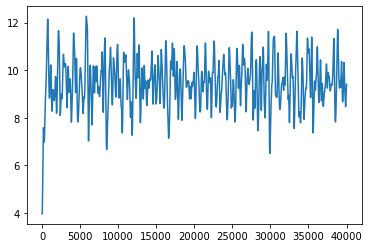

In [21]:
plt.plot(scipy.ndimage.filters.gaussian_filter(ty.astype(float), 51))

In [22]:
np.mean(pvec)

0.049999999999999996

In [23]:
np.mean(acc[2500:])

0.17104

Text(0, 0.5, 'Running Accuracy')

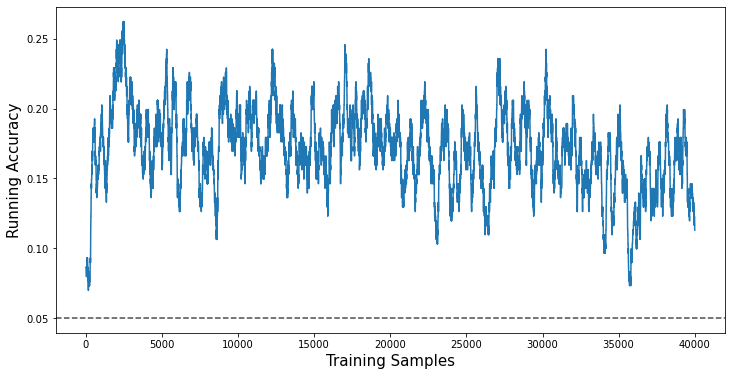

In [24]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(scipy.ndimage.filters.uniform_filter(acc, 301))
plt.axhline(np.mean(pvec), linestyle="--", color="k", alpha=0.7, label="Random Performance")
plt.xlabel("Training Samples", fontsize=15)
plt.ylabel("Running Accuracy", fontsize=15)

TypeError: Invalid shape (10,) for image data

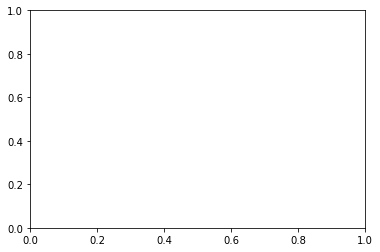

In [135]:
fig, ax = plt.subplots()
ax.imshow(tx[:10].transpose(), aspect="auto")

## Setting Up The Problem



One form of this complaint(which to be clear I think is quite accurate in many ways) is that deep learning can only ever learn to do some sort of fancy interpolation of its training data. For example take this very characteristic tweet from François Chollet;



I've been a twitter follower of François long enough that I've started to get annoyed by his regular broadcasting of these sorts of reminders about his favored mental model for the inner workings of neural networks. But, although deep nets can sometimes work analogously to a dimension reduction + label interpolation we should remember that this is in fact still just an analogy and there are lots of interesting properties of deep nets trained in certain ways that don't line up with the intuition you would get from thinking about them this way, at least in my opinion. 

So I started trying to think of toy problems which might highlight non-interpolative behavior of deep neural networks and the most simple thing I could think of turned out to have very interesting behavior. The basic idea is to use a data stream where we continuously change what target class label is the "true" class label associated to each input. If we never associate an input to the same output label twice then we should naively expect an interpolative approach to fare worse than random guessing since any prediction drawn from labels which have been seen to be associated to that output in the past is guaranteed to be incorrect. But as we will see a simple feed forward deep neural net trained on this same data actually learns to be good at predicting the next label that will be fed in as opposed to being good at regurgitating the labels that it has seen before. This wouldn't be at all surprising if we were training up something like an LSTM which was allowed to explicitly keep some sort of state 

The implicit criticism of deep learning being that deep learning extrapolative. With the notion that interpolation is memorization and extrapolation is generalization (and in some way "understanding"). With this mind set we should expect that deep learning methods are of limited generalization power because their performance relies mostly on some combination of the learning of a fuzzy relationship between inputs (the low dimensional manifold mentioned above) and memorization of the associated outputs from your training data (the interpolator). But exactly what this really means gets really fuzzy when your models and label spaces get really complex. For example the new large language models like GPT-2 or T5 are often maligned as "simply" doing a sort of interpolation over their input texts. But I think it would be a mistake to dismiss what is going on as being a form of memorization as opposed to a limited form of understanding simply because the computational mechanisms under the hood look like a scaled up version of something we think we understand (interpolation and function approximation). 

What is really going on in something as large and complex as GPT-2 is anyones guess. Memorization of the training corpus certainly plays a role at some level since you can easily get the models to regurgitate verbatim things like RSA public keys from their training data which are fundamentally patternless by nature. But I would argue (and I would not be alone) that memorization at some level is part of any sort of learning process. 

## Deep But Non-Interpolative

So now we turn to trying to apply deep nets to problems that seem fundamentally unsolvable via interpolation (deep or otherwise) to see if anything interesting happens. I think that the place where your mind most naturally goes would be to consider problems where the domain covered by the test inputs  has little or no overlap with the domain covered by the training data. In the more classical interpolation domain that would be analoguous to fitting an interpolator to x values between 0 and 1 and then testing the accuracy on values between 1 and 100. You may happen to get good generalization if your function is very simple but the predictions would be better called extrapolations rather than interpolations. 

But for very high dimensional data all data points train or test tend to be outside the boundaries of anything we have ever seen. Which means that for very high dimensional input data we are constantly doing what could be considered an extrapolation. Deep neural networks actually seem to be the best way to deal with building models on these very high dimensional input data sets.

If the theory that deep nets learn a low dimensional manifold which effectively tiles the data space holds then the reason for this ability to generalize to inputs well outside of the input domain is because if we could see the learned low dimensional manifold then we should see that the training data effectively covers the locus of the test data on the learned manifold (if we are observing good generalization) and that the labels in small regions on that manifold are relatively pure. But as we mentioned up above the hypothetical implicit low dimensional manifold learned by the network isn't necesarily available to us. We have only the activations of the network and no certain way to associate those to a definite learned low dimensional manifold.

We can always just take the activations in the second to last layer of the network as a guesstimate of an embedding of the manifold and ignore all the complications. But although locality in that activation space likely would track locality of the learned low dimensional data manifold the embedding isn't necessarily itself low dimensional. Because even if the analogy with interpolators holds true the last few layers of activations of the network wouldn't correspond to the manifold itself but instead to some sort of bump functions which indicate where on the manifold we are. In the raw interpolation case that means that even if the implicit space $\phi$ is single dimensional the encoding of that space as a series of bump functions $h_i(x)$ could potentially be as high dimensional as we have data points. 

Even if the foregoing discussion isn't clear to you what should be clear is that what it means for new inputs to be "sufficiently different" from the training data that we should count the idea of "deep interpolation" impossible is muddy at best. So we need another strategy.





# The Function Approximation/Optimization View

One way to think about how deep learning works is that each network architecture dictates a family of parameterized functions $\hat{y} = f(x, \theta)$ which turn inputs $x$ into predictions for a target $y$. We pick some loss function $L(y, \hat{y})$ which is small when $y\approx \hat{y}$ and try to minimize the expectation of that loss over our training examples by picking a "good" set of parameters for our function $\theta^*$. 


Given a number of training pairs $(x_i, y_i)$ pairs drawn from some sort of underlying distribution you can evaluate some measure of how well the predictions $\hat{y_i}$ line up with the true values $y_i$ try to find a set of parameters $\theta$ for our model such that the ouptuts of our function $\hat{y}_i$ tend to match the observed $y_i$ on our training set. We can pick some quantitative measure of similarity of the predictions and targets and then incrementally update our parameters to get better values for whatever metric we choose when evaluated on the training data. 

With respect to the generalization power of the learned function the thinking goes that if we can achieve predictions which are close to the observed targets for our training data then we will get good generalization to future unobserved (x,y) pairs precisely when the future $x$ are similar enough to those seen in the training data and the relationship which maps x to y is the same as it was for our training data. But if either the inputs x are too dissimilar and/or the relationship to target values changes then all bets are off. 

From the interpolation perspective 

But certainly from this perspective something you should always expect is that your learned function $f(x, \theta^*)$ should be at most as good at predicting future values as it is at reconstructing the values which have 


The term interpolation goes hand in hand with the term "function approximation" and I think the temptation is strong to assume that it is the power of neural networks to <a href=https://en.wikipedia.org/wiki/Universal_approximation_theorem>flexibly approximate any function</a> which is at the root of their usefulness. But the capacity to closely approximate any function if given enough parameters isn't unique to deep neural networks, in fact just about every sort of commonly used machine learning model can approximate just about any function if you make the model large enough. It isn't the space of functions that it is possible to represent that makes deep networks interesting or useful it is the way in which they explore that space of possible functions. 

xtremely large lookup table of output values given input values can closely approximate any function . 

A table lookup is the poster child of the sort of model that cannot generalize outside of the distribution of its training data. I think that the mental model that says that deep neural networks cannot learn to generalize to patterns which are outside of their training data  The idea that neural networks work more or less as label interpolators is to suggest that in fact a table lookup is a somewhat accurate mental model of what is really going on under the hood in deep networks. 

To say that neural networks are really "just" learnable function approximators or "just" label interpolators is, I think, to dismiss the biggest reason that deep learning is so interesting. Because the generalization power of neural networks isn't determined by the vast size of the space of functions that they can approximate but is somehow intimately linked with the peculiar way in which the dynamics of a deep learning system explores that space. 

How can I be so sure that the success of deep neural networks as learning machines isn't well captured by just assuming that they are acting as some sort of fancy high dimensional interpolation machines? Well... actually the success of modern deep learning really may be coming mostly from their ability to act as effective interpolators. When you have a huge amount of data eventually "just" learning how to effectively tile the space of your inputs  and then interpolate labels over that space is incredibly powerful even if there is no real "understanding" involved.

# Problems that  can't be solved with function approximation/Interpolation



But even if label interpolation may possibly be one of the key things going on it really can't be the only thing going on, at least not in all situations. I'm going to try and convince you that sometimes we need to think of the learning process of deep neural networks as being something other than interpolation and/or function approximation by applying a standard deep neural network learning process to a problem that I think very clearly cannot be solved by any sort of interpolative approach 

. But one strong argument that something other than pure interpolation is going on is that the learning dynamics of even a simple feed forward network 

The problem isn't anything fancy it is just counting. Given a sequence of tokens predict an output "class" which is just the number of times that token has been seen previously. So the first time the system is fed the token "a" it is labeled as being "class 0" the second time it sees the same symbol as an input it will be labeled as "class 1" and so on and so forth. 

This problem is of course completely trivally solved by normal programming methods (just store the seen counts for each symbol in a hash map, problem solved). But it is also completely impossible to solve if your system isn't allowed to keep state in some way since the correct output is different each and every time you see some particular input. In particular any sort of function approximation/interpolation approach where we think of the learning problem as trying to find some single "best" set of parameters $\theta^*$ for a parameterized function $\hat{y} = f(x | \theta^*)$ such that 


Attempting to solve this problem as a probabilistic classification problem via deep neural networks seems quite misguided. Neural networks don't really have a natural way to output discrete counts other than as a vector of probabilities over a set of possible classes which seems a little wasteful. 

More importantly, since the correct output for each token changes each and every time that token is fed in to the system as an example no sort of interpolative approach could possibly hope to achieve good performance on this task. The desired label for each output isn't even in the set of labels that have ever been associated to the inputs in the previously seen data and so any interpolation of those labels is guaranteed to be wrong! So from the theoretical perspective where we treat deep networks as fancy interpolators we should expect any deep net we train not only to do a terrible job it shouldn't even be able to match the accuracy of completely random assignment of labels!

However as you may have guessed from the title of this post the actual learning dynamics that you see when you carry out this experiment are not what you would naively expect from any sort of interpolative system.
